# Projeto Prático de Predição

### Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importando os dados

In [2]:
dados = pd.read_csv('california_housing_train.csv')

### Visualizando os dados

In [3]:
display(dados.head(10))

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
2,-114.56,33.69,17,720,174,333,117,1.6509,85700
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500
5,-114.58,33.63,29,1387,236,671,239,3.3438,74000
6,-114.58,33.61,25,2907,680,1841,633,2.6768,82400
7,-114.59,34.83,41,812,168,375,158,1.7083,48500
8,-114.59,33.61,34,4789,1175,3134,1056,2.1782,58400
9,-114.60,34.83,46,1497,309,787,271,2.1908,48100


## Análise Exploratória

* id - id único de cada local
* latitude - latitude do local
* longitude - longitude do local
* median-age - mediana nas idades das casas no local
* total_rooms - contagem de cômodos na região
* total_bedrooms - contagem do total de quartos na região
* population - população total na região
* households - número total de casas na região
* median-income - mmediana da renda das pessoas na região (em dezenas de milhares por ano)
* median-House_value: mediana dos valores das casas da região (<strong>VARIÁVEL ALVO</strong>)

In [4]:
display(dados.describe(include='all'))

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
# Sem valores nulos, dados já tratados
print(dados.isnull().sum())

longitude           0
latitude            0
housingMedianAge    0
totalRooms          0
totalBedrooms       0
population          0
households          0
medianIncome        0
medianHouseValue    0
dtype: int64


### Criando a matriz de correlação

In [6]:
# Cria a matriz de correlação a partir do próprio pandas
correlacao = dados.corr()

display(correlacao)

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housingMedianAge,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
totalRooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
totalBedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
medianIncome,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
medianHouseValue,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


### Plotando a matriz de correlação

Quanto mais próximo do 1, mais relacionado esses atributos estão <br>
Quando mais próximo do -1, mais inversamente relacionados esses atributos estão

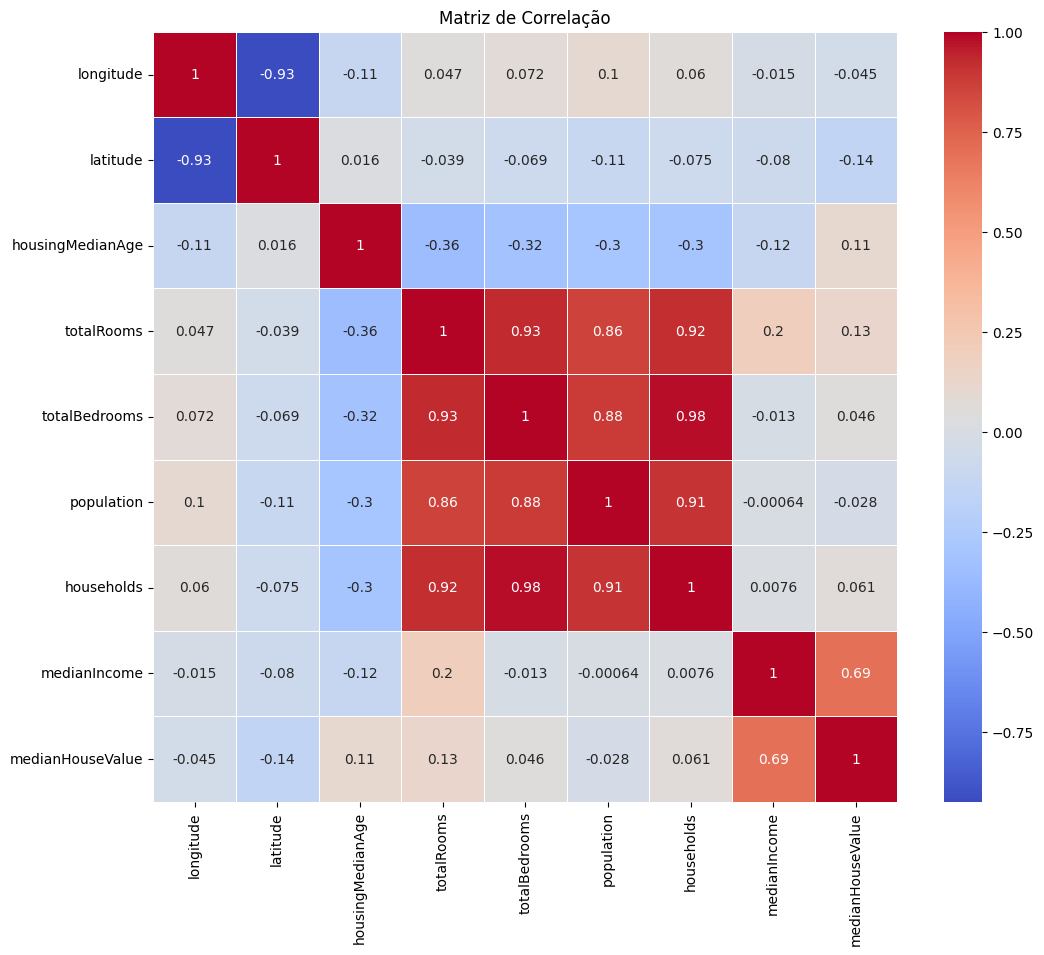

In [7]:
plt.figure(figsize=(12, 10))  
# Cria um mapa de calor para a matriz de correlação, definindo o esquema de cores
sns.heatmap(correlacao, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

Dessa matriz de correlação, é possível inferir a ligação entre valor mediano das casas e valor mediano de renda, insight muito importante

## Treinamento do modelo

Separando dados de treinamento e atributo alvo

In [8]:
y = dados['medianHouseValue']

X = dados.drop(columns='medianHouseValue')

print(y)
display(X)

0         66900
1         80100
2         85700
3         73400
4         65500
          ...  
16995    111400
16996     79000
16997    103600
16998     85800
16999     94600
Name: medianHouseValue, Length: 17000, dtype: int64


,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome
0,-114.31,34.19,15,5612,1283,1015,472,1.4936
1,-114.47,34.40,19,7650,1901,1129,463,1.8200
2,-114.56,33.69,17,720,174,333,117,1.6509
3,-114.57,33.64,14,1501,337,515,226,3.1917
4,-114.57,33.57,20,1454,326,624,262,1.9250
...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52,2217,394,907,369,2.3571
16996,-124.27,40.69,36,2349,528,1194,465,2.5179
16997,-124.30,41.84,17,2677,531,1244,456,3.0313
16998,-124.30,41.80,19,2672,552,1298,478,1.9797


### Construindo o modelo

In [9]:
from sklearn.neighbors import KNeighborsRegressor
# Para separação dos dados
from sklearn.model_selection import train_test_split

Declarando o modelo com 3 vizinhos

In [23]:
modelo = KNeighborsRegressor(7)

Treinando o modelo com os dados de treino

In [24]:
modelo.fit(X,y)

KNeighborsRegressor(n_neighbors=7)

In [25]:
y_pred = modelo.predict(X)

## Avaliando a performance

In [14]:
from sklearn.metrics import mean_absolute_error

In [26]:
mae = mean_absolute_error(y_pred, y)

print(mae)

65274.25744537815


## Vamos ver em um DF (valor esperado da predição)

In [17]:
dados2 = pd.DataFrame(y)

In [18]:
dados2['predicao'] = y_pred

In [21]:
display(dados2.sample(10))

,medianHouseValue,predicao
11905,144400,146500.000000
15749,318400,258866.666667
985,150000,143200.000000
12386,63400,81900.000000
3738,118100,112233.333333
15248,267400,237100.000000
9040,48000,93666.666667
11973,133700,152166.666667
7064,200000,189500.000000
6212,105100,103633.333333


In [22]:
display(dados2.describe())

,medianHouseValue,predicao
count,17000.000000,17000.000000
mean,207300.912353,207369.360078
std,115983.764387,88609.781215
min,14999.000000,38166.333333
25%,119400.000000,143533.333333
50%,180400.000000,186300.000000
75%,265000.000000,253575.250000
max,500001.000000,500001.000000


### Validação (de uma maneira diferente)
Separar os modelos entre conjunto de treino e conjunto de testes

In [ ]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.2)

In [36]:
print(X_train.shape)

(13600, 8)


In [37]:
modelo2 = KNeighborsRegressor(3)

In [38]:
modelo2.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [40]:
predicao2 = modelo2.predict(X_test)

### Analisar o erro

In [42]:
print(mean_absolute_error(predicao2, y_test))

81475.73088235295


## Usando árvores de decisão

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
# modelotree = DecisionTreeRegressor(random_state=1, max_depth=8)
modelotree = DecisionTreeRegressor(random_state=1, min_samples_leaf=15)

In [49]:
modelotree.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=15, random_state=1)

In [50]:
predicao = modelotree.predict(X_test)

In [51]:
print(mean_absolute_error(predicao, y_test))

39663.62098113428


### Usando Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
modeloRandom = RandomForestRegressor(random_state=1, n_jobs=-1, n_estimators=500)

In [59]:
modeloRandom.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=1)

In [60]:
predicao = modeloRandom.predict(X_test)

In [61]:
print(mean_absolute_error(predicao, y_test))

31058.257090000003
